In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
# consts

# dummy data for the example.
# replace this with the real report!
GITHUB_USAGE_CSV = 'summarizedUsageReport.dummy.csv'

In [4]:
# utils

def title(text):
    print("=" * 50)
    print(text)
    print("=" * 50)

In [5]:
# load and examine the data structure

# column types
types = {
    'date': 'datetime64[ns]',
}

df = pd.read_csv(GITHUB_USAGE_CSV, parse_dates=['date'])

print("data shape:", df.shape)
print("\ncolumns:", df.columns.tolist())
print("\nfirst few rows:")
df.head()

data shape: (1500, 13)

columns: ['date', 'product', 'sku', 'quantity', 'unit_type', 'applied_cost_per_quantity', 'gross_amount', 'discount_amount', 'net_amount', 'organization', 'repository', 'cost_center_name', 'model']

first few rows:


,date,product,sku,quantity,unit_type,applied_cost_per_quantity,gross_amount,discount_amount,net_amount,organization,repository,cost_center_name,model
0,2024-10-01,actions,actions_linux,24116.000000,minutes,0.0080,192.928000,192.928,0.000000,cluny,hildegard,NaN,NaN
1,2024-10-02,codespaces,codespaces_storage,11.232475,gigabyte-hours,0.0001,0.001123,0.000,0.001123,cluny,aquinas,NaN,NaN
2,2024-10-03,git_lfs,git_lfs_bandwidth,320.311000,gigabytes,0.0875,28.027213,0.000,28.027213,cluny,aquinas,NaN,NaN
3,2024-10-04,actions,actions_self_hosted_linux,904.000000,minutes,0.0000,0.000000,0.000,0.000000,cluny,hildegard,NaN,NaN
4,2024-10-05,git_lfs,git_lfs_bandwidth,727.899000,gigabytes,0.0875,63.691162,0.000,63.691162,cluny,ockham,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       1500 non-null   datetime64[ns]
 1   product                    1500 non-null   object        
 2   sku                        1500 non-null   object        
 3   quantity                   1500 non-null   float64       
 4   unit_type                  1500 non-null   object        
 5   applied_cost_per_quantity  1500 non-null   float64       
 6   gross_amount               1500 non-null   float64       
 7   discount_amount            1500 non-null   float64       
 8   net_amount                 1500 non-null   float64       
 9   organization               1500 non-null   object        
 10  repository                 1500 non-null   object        
 11  cost_center_name           0 non-null      float64       
 12  model 

In [7]:
# calculate weekly spend

title("WEEKLY SPEND")

# sum up weekly spend
weekly_spend = df.groupby(pd.Grouper(key='date', freq='W'))['net_amount'].sum().reset_index()
weekly_spend = weekly_spend.sort_values('date')

print(f"\ndate range: {weekly_spend['date'].min()} to {weekly_spend['date'].max()}")
print(f"number of weeks: {len(weekly_spend)}")
print(f"total spend: ${weekly_spend['net_amount'].sum():.2f}")
print("\nfirst few weeks:")
weekly_spend.head()

WEEKLY SPEND

date range: 2024-10-06 00:00:00 to 2024-12-01 00:00:00
number of weeks: 9
total spend: $48968.07

first few weeks:


,date,net_amount
0,2024-10-06,9590.164120
1,2024-10-13,6343.735101
2,2024-10-20,6334.862146
3,2024-10-27,3456.127749
4,2024-11-03,5522.394156


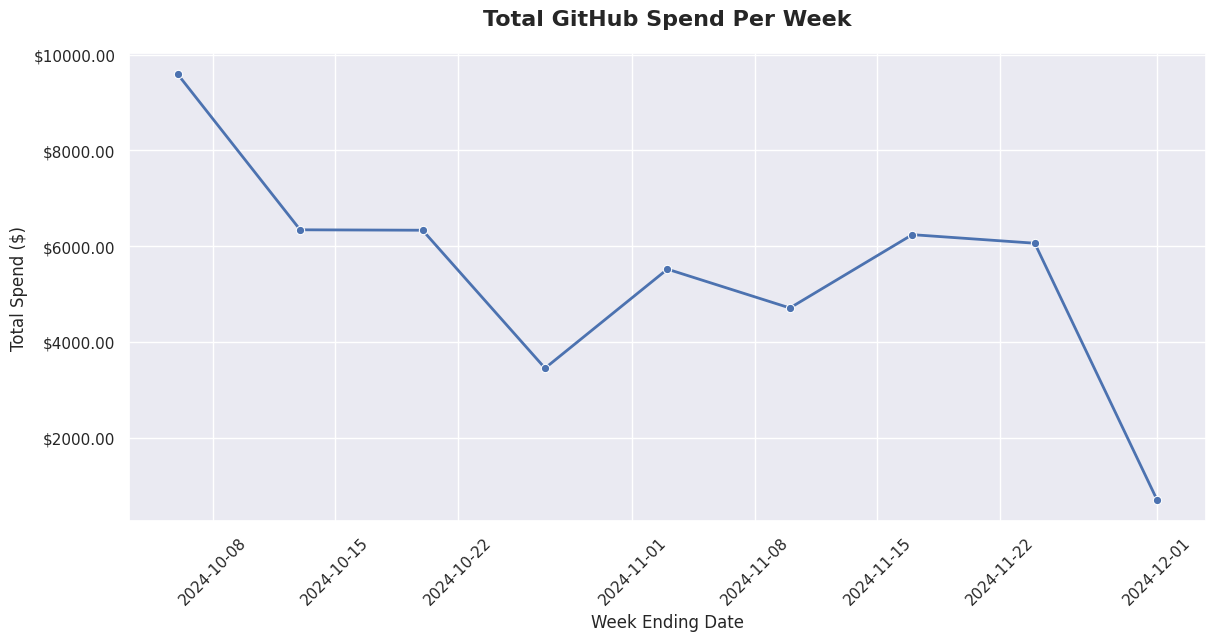

In [8]:
# graph weekly spend

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_spend, x='date', y='net_amount', marker='o', linewidth=2, markersize=6)
plt.title('Total GitHub Spend Per Week', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

plt.xlabel('Week Ending Date', fontsize=12)
plt.xticks(rotation=45)

plt.ylabel('Total Spend ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter('${x:.2f}')

plt.show()


In [9]:
# calculate top SKUs

title("TOP SKUS")

# total spend by SKU
sku_spend = df.groupby('sku')['net_amount'].sum().reset_index()
sku_spend = sku_spend.sort_values('net_amount', ascending=False)

# get top 10 SKUs
top_skus = sku_spend.head(10)['sku'].tolist()

print(f"\ntotal number of SKUs: {len(sku_spend)}")
print(f"total spend across all SKUs: ${sku_spend['net_amount'].sum():.2f}")
print("\ntop 10 SKUs by total spend:")
sku_spend.head(10)


TOP SKUS

total number of SKUs: 19
total spend across all SKUs: $48968.07

top 10 SKUs by total spend:


,sku,net_amount
8,actions_macos,16453.047304
4,actions_linux_4_core,6896.416000
16,copilot_for_business,4900.586900
0,actions_linux,4134.765624
9,actions_macos_xl,3274.560000
1,actions_linux_16_core,2934.784000
6,actions_linux_8_core,2814.336000
5,actions_linux_64_core,1468.672000
17,git_lfs_bandwidth,1304.350600
3,actions_linux_32_core,1271.808000


In [10]:
# calculate weekly spend by SKU

title("SPENDING ANALYSIS BY SKU")

# filter data to top SKUs, then group by week and SKU
weekly_sku_spend = df[df['sku'].isin(top_skus)].groupby([
    pd.Grouper(key='date', freq='W'), 'sku'
])['net_amount'].sum().reset_index()

print(f"\ndate range: {weekly_sku_spend['date'].min()} to {weekly_sku_spend['date'].max()}")
print(f"total data points: {len(weekly_sku_spend)}")

print(f"\nsummary by top SKUs:")
for sku in top_skus:
    sku_data = weekly_sku_spend[weekly_sku_spend['sku'] == sku]
    if len(sku_data) > 0:
        print(f"\n{sku}:")
        print(f"  total spend: ${sku_data['net_amount'].sum():.2f}")
        print(f"  average weekly: ${sku_data['net_amount'].mean():.2f}")
        print(f"  max weekly: ${sku_data['net_amount'].max():.2f}")
        print(f"  weeks active: {len(sku_data)}")


SPENDING ANALYSIS BY SKU

date range: 2024-10-06 00:00:00 to 2024-12-01 00:00:00
total data points: 79

summary by top SKUs:

actions_macos:
  total spend: $16453.05
  average weekly: $1828.12
  max weekly: $5239.79
  weeks active: 9

actions_linux_4_core:
  total spend: $6896.42
  average weekly: $766.27
  max weekly: $1241.44
  weeks active: 9

copilot_for_business:
  total spend: $4900.59
  average weekly: $544.51
  max weekly: $797.42
  weeks active: 9

actions_linux:
  total spend: $4134.77
  average weekly: $459.42
  max weekly: $760.46
  weeks active: 9

actions_macos_xl:
  total spend: $3274.56
  average weekly: $654.91
  max weekly: $1761.92
  weeks active: 5

actions_linux_16_core:
  total spend: $2934.78
  average weekly: $366.85
  max weekly: $736.38
  weeks active: 8

actions_linux_8_core:
  total spend: $2814.34
  average weekly: $312.70
  max weekly: $739.33
  weeks active: 9

actions_linux_64_core:
  total spend: $1468.67
  average weekly: $293.73
  max weekly: $614.66


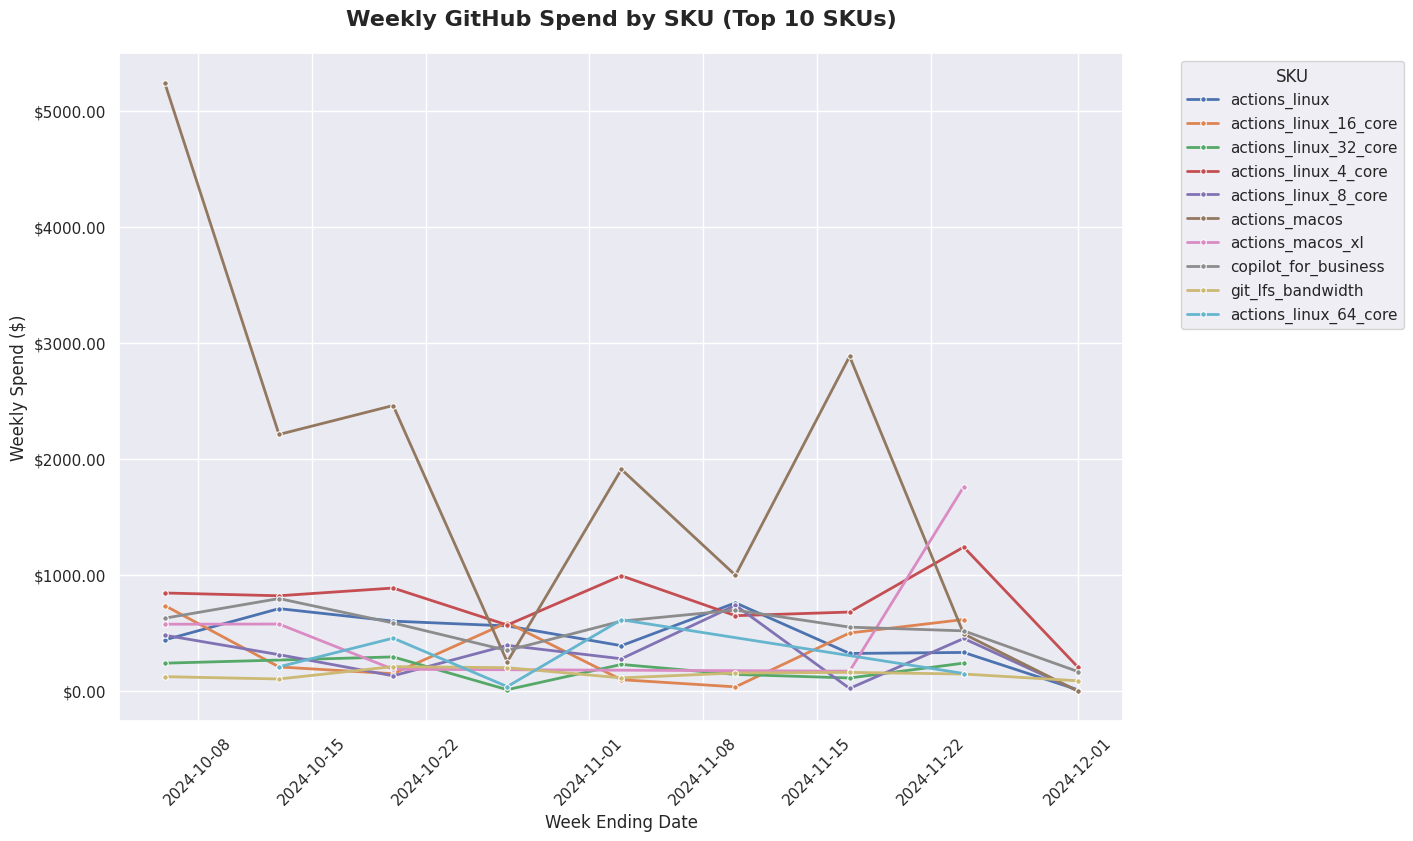

In [11]:
# graph weekly spend by SKU

plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_sku_spend, x='date', y='net_amount', hue='sku', 
             marker='o', linewidth=2, markersize=4)

plt.title('Weekly GitHub Spend by SKU (Top 10 SKUs)', fontsize=16, fontweight='bold', pad=20)
plt.legend(title='SKU', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xlabel('Week Ending Date', fontsize=12)
plt.xticks(rotation=45)

plt.ylabel('Weekly Spend ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter('${x:.2f}')

plt.show()

In [12]:
# calculate top repositories

title("TOP REPOSITORIES")

repo_spend = df.groupby('repository')['net_amount'].sum().reset_index()
repo_spend = repo_spend.sort_values('net_amount', ascending=False)

top_repos = repo_spend.head(10)['repository'].tolist()

print(f"\ntotal number of repositories: {len(repo_spend)}")
print(f"total spend across all repositories: ${repo_spend['net_amount'].sum():.2f}")
print(f"spend without repository info: ${df[df['repository'].isna()]['net_amount'].sum():.2f}")
print("\ntop 10 repositories by total spend:")
print(repo_spend.head(10))


TOP REPOSITORIES

total number of repositories: 9
total spend across all repositories: $48968.07
spend without repository info: $0.00

top 10 repositories by total spend:
   repository    net_amount
1      anselm  18823.077001
8      ockham  11499.905735
6   hildegard  10838.416959
2     aquinas   2976.557384
3   augustine   2354.044466
0     abelard   1767.774189
5    avicenna    304.647627
7  maimonides    266.478400
4    averroes    137.169794


In [13]:
# calculate weekly spend by repository

title("SPENDING ANALYSIS BY REPOSITORY")

# filter data to top repositories, then group by week and repository
weekly_repo_spend = df[df['repository'].isin(top_repos)].groupby([
    pd.Grouper(key='date', freq='W'), 'repository'
])['net_amount'].sum().reset_index()

print(f"\ndate range: {weekly_repo_spend['date'].min()} to {weekly_repo_spend['date'].max()}")
print(f"total data points: {len(weekly_repo_spend)}")

print(f"\nsummary by top repositories:")
for repo in top_repos:
    repo_data = weekly_repo_spend[weekly_repo_spend['repository'] == repo]
    if len(repo_data) > 0:
        print(f"\n{repo}:")
        print(f"  total spend: ${repo_data['net_amount'].sum():.2f}")
        print(f"  average weekly: ${repo_data['net_amount'].mean():.2f}")
        print(f"  max weekly: ${repo_data['net_amount'].max():.2f}")
        print(f"  weeks active: {len(repo_data)}")


SPENDING ANALYSIS BY REPOSITORY

date range: 2024-10-06 00:00:00 to 2024-12-01 00:00:00
total data points: 80

summary by top repositories:

anselm:
  total spend: $18823.08
  average weekly: $2091.45
  max weekly: $3846.29
  weeks active: 9

ockham:
  total spend: $11499.91
  average weekly: $1277.77
  max weekly: $3240.40
  weeks active: 9

hildegard:
  total spend: $10838.42
  average weekly: $1204.27
  max weekly: $3320.04
  weeks active: 9

aquinas:
  total spend: $2976.56
  average weekly: $330.73
  max weekly: $673.78
  weeks active: 9

augustine:
  total spend: $2354.04
  average weekly: $261.56
  max weekly: $581.91
  weeks active: 9

abelard:
  total spend: $1767.77
  average weekly: $196.42
  max weekly: $680.37
  weeks active: 9

avicenna:
  total spend: $304.65
  average weekly: $38.08
  max weekly: $198.77
  weeks active: 8

maimonides:
  total spend: $266.48
  average weekly: $29.61
  max weekly: $62.39
  weeks active: 9

averroes:
  total spend: $137.17
  average weekly

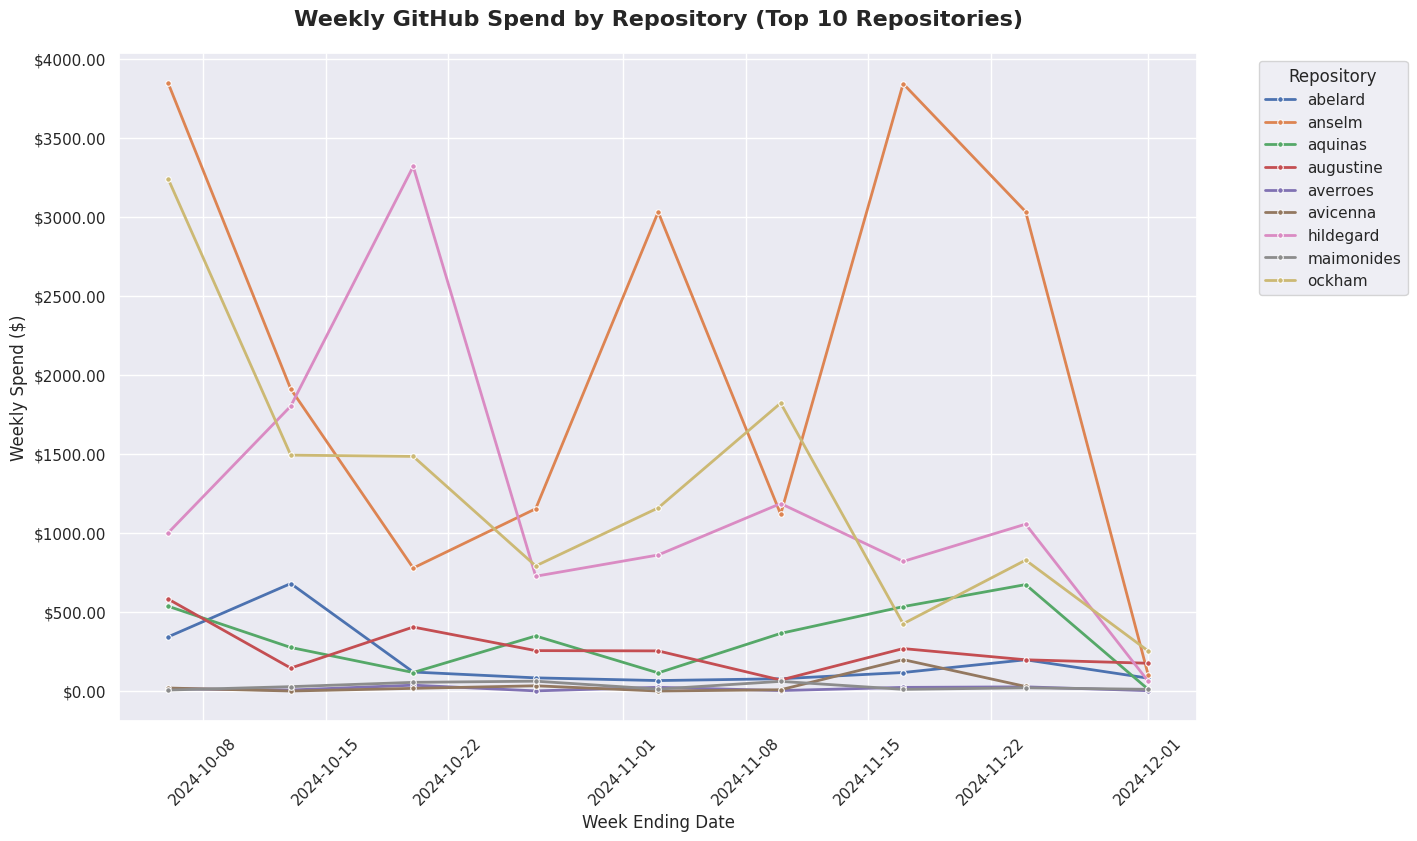

In [14]:
# graph weekly spend by repository

plt.figure(figsize=(14, 8))
sns.lineplot(data=weekly_repo_spend, x='date', y='net_amount', hue='repository', 
             marker='o', linewidth=2, markersize=4)


plt.title('Weekly GitHub Spend by Repository (Top 10 Repositories)', fontsize=16, fontweight='bold', pad=20)
plt.legend(title='Repository', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xlabel('Week Ending Date', fontsize=12)
plt.xticks(rotation=45)

plt.ylabel('Weekly Spend ($)', fontsize=12)
plt.gca().yaxis.set_major_formatter('${x:.2f}')

plt.show()


In [15]:
# SKU cost breakdown by repository (top 10 repositories only)

title("SKU COST BY REPOSITORY")

# create pivot table showing cost of each SKU by repository
pivot_table = df.pivot_table(
    values='net_amount', 
    index='repository', 
    columns='sku', 
    aggfunc='sum', 
    fill_value=0
).round(2)

# filter to only include top 10 repositories
pivot_table = pivot_table[pivot_table.index.isin(top_repos)]

# set pandas display options for better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 15)

# pivot SKU against repository (top 10 repositories only)
styled_pivot = pivot_table.style.format('${:,.2f}').set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'right')]}
])
display(styled_pivot)

# reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width') 
pd.reset_option('display.max_colwidth')


SKU COST BY REPOSITORY


sku,actions_linux,actions_linux_16_core,actions_linux_2_core_advanced,actions_linux_32_core,actions_linux_4_core,actions_linux_64_core,actions_linux_8_core,actions_linux_8_core_arm,actions_macos,actions_macos_xl,actions_self_hosted_linux,actions_self_hosted_macos,actions_storage,actions_unknown,actions_windows,codespaces_storage,copilot_for_business,git_lfs_bandwidth,git_lfs_storage
repository,,,,,,,,,,,,,,,,,,,
abelard,$155.24,$0.00,$7.07,$0.00,$328.26,$0.00,$56.16,$1.54,$325.68,$577.60,$0.00,$0.00,$11.44,$5.50,$14.84,$0.01,$190.83,$93.58,$0.03
anselm,"$1,047.17","$1,232.70","$1,037.95",$470.40,"$2,341.78",$174.34,$532.77,$317.79,"$7,961.18","$1,949.60",$0.00,$0.00,$301.32,$0.00,$151.50,$0.07,"$1,054.38",$250.07,$0.06
aquinas,$295.82,$356.03,$0.00,$0.00,$439.15,$0.00,$383.10,$0.00,$856.29,$0.00,$0.00,$0.00,$5.57,$0.00,$194.18,$0.02,$317.70,$128.67,$0.02
augustine,$254.46,$149.44,$188.56,$112.51,$300.48,$0.00,$132.64,$19.68,$240.44,$576.00,$0.00,$0.00,$24.84,$0.00,$71.78,$0.02,$198.73,$84.46,$0.02
averroes,$20.14,$0.00,$0.00,$0.00,$13.22,$0.00,$23.94,$0.00,$60.11,$0.00,$0.00,$0.00,$1.45,$0.00,$0.00,$0.00,$10.10,$8.21,$0.00
avicenna,$27.81,$8.38,$22.80,$5.38,$57.46,$0.00,$0.00,$0.00,$0.67,$171.36,$0.00,$0.00,$3.71,$0.00,$0.00,$0.00,$7.08,$0.00,$0.00
hildegard,"$1,190.77",$922.62,$0.00,$272.38,"$2,000.69","$1,255.94",$729.25,$187.87,"$2,312.54",$0.00,$0.00,$0.00,$137.28,$0.00,$246.56,$0.07,"$1,123.97",$458.41,$0.06
maimonides,$27.30,$63.68,$0.00,$0.00,$21.73,$38.40,$13.47,$0.58,$62.46,$0.00,$0.00,$0.00,$0.94,$0.00,$13.44,$0.00,$16.72,$7.77,$0.00
ockham,"$1,116.06",$201.92,$0.00,$411.14,"$1,393.66",$0.00,$943.01,$179.74,"$4,633.67",$0.00,$0.00,$0.00,$193.79,$15.68,$156.75,$0.13,"$1,981.06",$273.19,$0.11


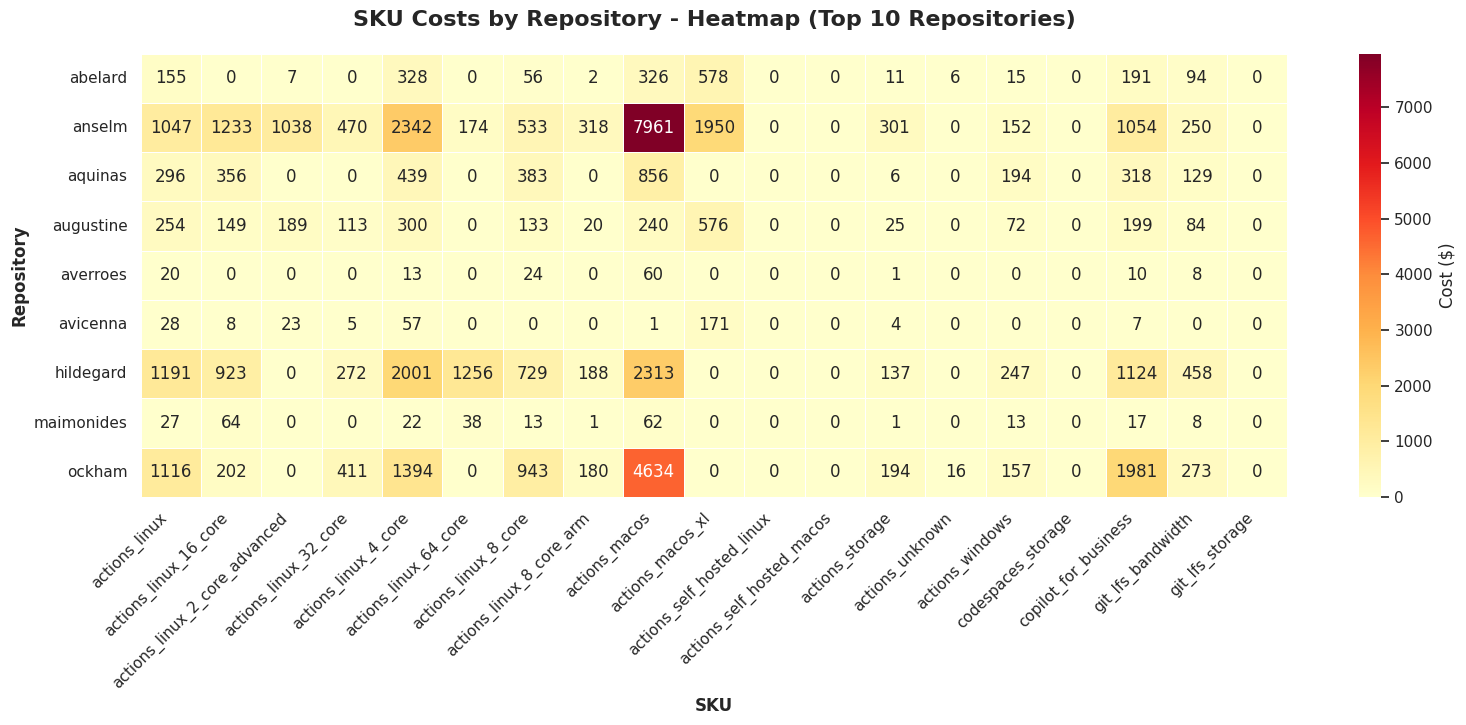

In [16]:
# visualize SKU costs by repository with heatmaps (top 10 repositories only)

# create an absolute heatmap
plt.figure(figsize=(16, 8))

sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f', # format as integers (since we're showing dollars)
    cmap='YlOrRd',
    cbar_kws={'label': 'Cost ($)'},
    linewidths=0.5,
    square=False,
)

plt.title('SKU Costs by Repository - Heatmap (Top 10 Repositories)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()

plt.xlabel('SKU', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.ylabel('Repository', fontsize=12, fontweight='bold')
plt.yticks(rotation=0)

plt.show()